# SymPy

* http://www.sympy.org/en/index.html
* 数式計算ライブラリ
* 別途インストールが必要（Anaconda には同梱済み）
* http://www.scipy-lectures.org/packages/sympy.html
    * http://www.turbare.net/transl/scipy-lecture-notes/packages/sympy.html
* http://chezou.hatenablog.com/entry/2015/11/23/210207
* 例: https://en.wikipedia.org/wiki/Lennard-Jones_potential

In [1]:
import sympy as sy

In [2]:
# for Jupyter Notebook
sy.init_printing()

## 基本操作

In [3]:
epsilon = sy.Symbol('ε')
epsilon

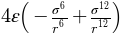

In [94]:
sigma = sy.Symbol('σ')
r = sy.Symbol('r')
U = 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)
U

In [95]:
str(U)

'4*ε*(-σ**6/r**6 + σ**12/r**12)'

In [96]:
sy.latex(U)

'4 ε \\left(- \\frac{σ^{6}}{r^{6}} + \\frac{σ^{12}}{r^{12}}\\right)'

### 展開

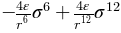

In [97]:
sy.expand(U)

### 単純化

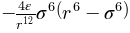

In [98]:
sy.simplify(U)

### 微分

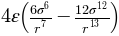

In [99]:
F = sy.diff(U, r)
F

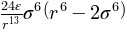

In [100]:
sy.simplify(F)

### 積分

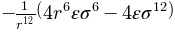

In [101]:
U2 = sy.integrate(F, r)
U2

In [102]:
sy.simplify(U - U2)

### 方程式を解く

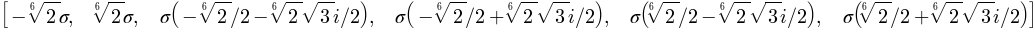

In [103]:
sy.solve(F, r)

### 代入

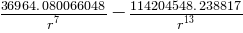

In [104]:
F.subs([(epsilon, 0.997), (sigma, 3.40)])

In [111]:
F.subs([(r, 2 ** (1 / 6) * sigma)])

## `Eq`, `solve`, `subs` の組み合わせ

In [57]:
A, B = sy.symbols("A B")
A_eq = sy.Eq(A, 4 * epsilon * sigma ** 12)
B_eq = sy.Eq(B, 4 * epsilon * sigma ** 6)
(A_eq, B_eq)

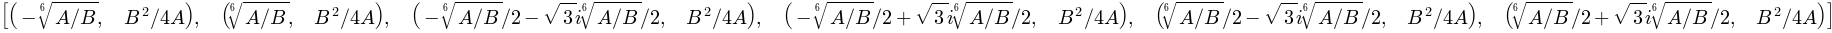

In [58]:
ses = sy.solve([A_eq, B_eq], [sigma, epsilon])
ses

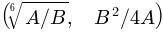

In [74]:
(sigma_AB, epsilon_AB) = ses[1]
(sigma_AB, epsilon_AB)

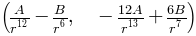

In [79]:
mapper = [(sigma, sigma_AB), (epsilon, epsilon_AB)]
U_AB = U.subs(mapper).expand()
F_AB = F.subs(mapper).expand()
(U_AB, F_AB)

## SAT

In [18]:
a, b, c, d = sy.symbols("a b c d")
logic = (a & b) | (c & d) | (a & ~c) | ~(b ^ d)
logic

In [19]:
sy.simplify_logic(logic)

In [20]:
sy.satisfiable(logic)

{c: False, d: True, b: True, a: True}